# Atividade 01: Data Handling

Vamos utilizar uma conhecida base pública para praticar os conceitos de Tratamento de dados vistos em sala de aula.

Instruções gerais:

1. Carregue a base de dados Titanic do Kaggle (train) no Jupyter em um DataFrame
2. Carregue, explore e visualize os dados através de gráficos
3. Remova as colunas que não agregam valor e justifique
4. Trate valores nulos por coluna ou remova as linhas com dados nulos
    - Ex.: Valores nulos da coluna 'Age', baseado em 'Pclass' e 'Sex'
5. Substitua colunas literais por valores numéricos
6. Normalize os valores numéricos que não são binários
7. Remova as colunas literais restantes

### 1. Carregue a base de dados Titanic do Kaggle (train) no Jupyter em um DataFrame

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/titanic/train.csv')

### 2. Carregue, explore e visualize os dados através de gráficos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


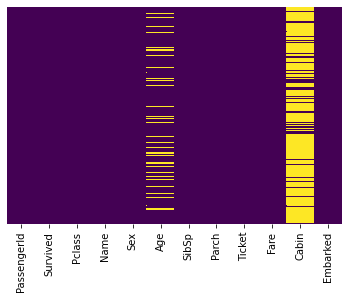

In [6]:
# Visualize null fields

sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')

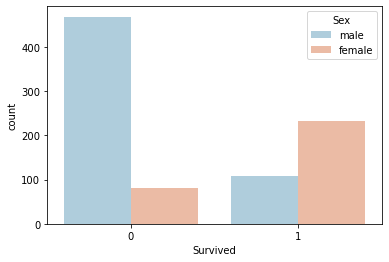

In [7]:
# Explore correlation Sex Pclass and Survived

sns.countplot(x='Survived',
              hue='Sex',
              data=df,
              palette='RdBu_r')

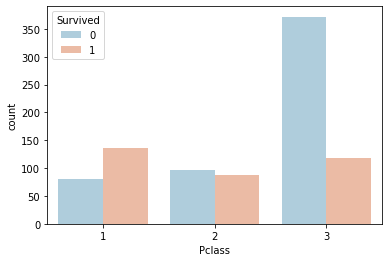

In [8]:
# Explore correlation between Pclass and Survived

sns.countplot(x='Pclass',
              hue='Survived',
              data=df,
              palette='RdBu_r')

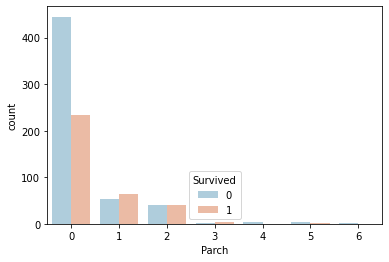

In [9]:
# Explore correlation between Parch and Survived

sns.countplot(x='Parch',
              hue='Survived',
              data=df,
              palette='RdBu_r')

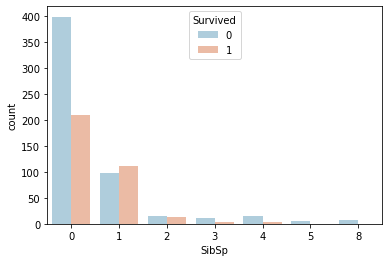

In [10]:
# Explore correlation between SibSp and Survived

sns.countplot(x='SibSp',
              hue='Survived',
              data=df,
              palette='RdBu_r')

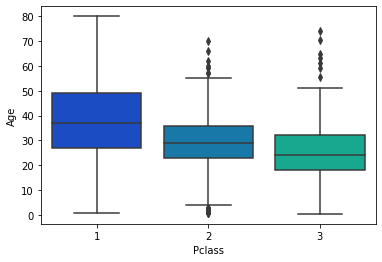

In [11]:
sns.boxplot(x='Pclass',
            y='Age',
            data=df,
            palette='winter')

### 3. Remova as colunas que não agregam valor e justifique

- **Name**: valor agregado de 'Name' pode  ser alcançado com 'Pclass', 'Fare', entre outros.
- **Cabin'**: muitos valores nulos e valor agregado de 'Cabin' pode ser alcançado com 'Pclass', 'Fare', entre outros.
- **PassengerId** e **Ticket**: identificadores únicos

In [13]:
cols = ['Name','Ticket','Cabin', 'PassengerId']
df   = df.drop(cols, axis=1)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### 4. Trate valores nulos por coluna ou remova as linhas com dados nulos

**Pegar valores únicos de cada coluna p/ usar no tratamento dos dados.**

In [14]:
pclass_vals = df.Pclass.unique().tolist()
sex_vals    = df.Sex.unique().tolist()

**`Age`: preencher valores nulos baseado em `Pclass` e `Sex`.**

In [15]:
for sex in sex_vals:
    for pclass in pclass_vals:
        median_age = df.loc[(df.Sex == sex) & (df.Pclass == pclass) & (~df.Age.isnull())].Age.median()
        df.loc[(df.Sex == sex) & (df.Pclass == pclass) & (df.Age.isnull()), ['Age']] = median_age

**`Embarked`: preencher valores nulos baseado na `moda`.**

In [16]:
embarked_mode = df.Embarked.dropna().mode()[0]
df.Embarked   = df.Embarked.fillna(embarked_mode)

### 5. Substitua colunas literais por valores numéricos

**Transformar os valores de `Pclass`, `Sex` e `Embarked` em numéricos.**

In [17]:
dummies = []
literal_cols = ['Pclass','Sex','Embarked']

for col in literal_cols:
    dummies.append(pd.get_dummies(df[col], drop_first=True))

In [18]:
titanic_dummies = pd.concat(dummies, axis=1)

titanic_dummies.head()

,2,3,male,Q,S
0,0,1,1,0,1
1,0,0,0,0,0
2,0,1,0,0,1
3,0,0,0,0,1
4,0,1,1,0,1


In [19]:
df = pd.concat((df, titanic_dummies), axis=1)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,2,3,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0,1,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,1,1,0,1


### 6. Normalize os valores numéricos que não são binários

In [20]:
from sklearn.preprocessing import StandardScaler

def normalizer(column_list):
    scaler = StandardScaler()
    for column in column_list:
        df[f'{column}_Scaled'] = StandardScaler().fit_transform(df[[column]])

In [21]:
normalizer(['Age', 'Fare'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,2,3,male,Q,S,Age_Scaled,Fare_Scaled
0,0,3,male,22.0,1,0,7.2500,S,0,1,1,0,1,-0.534891,-0.502445
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0,0.668392,0.786845
2,1,3,female,26.0,0,0,7.9250,S,0,1,0,0,1,-0.234070,-0.488854
3,1,1,female,35.0,1,0,53.1000,S,0,0,0,0,1,0.442776,0.420730
4,0,3,male,35.0,0,0,8.0500,S,0,1,1,0,1,0.442776,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1,0,1,0,1,-0.158865,-0.386671
887,1,1,female,19.0,0,0,30.0000,S,0,0,0,0,1,-0.760507,-0.044381
888,0,3,female,21.5,1,2,23.4500,S,0,1,0,0,1,-0.572494,-0.176263
889,1,1,male,26.0,0,0,30.0000,C,0,0,1,0,0,-0.234070,-0.044381


### 7. Remova as colunas literais restantes

In [22]:
drop_cols = ['Pclass','Sex','Embarked', 'Age', 'Fare']
df = df.drop(drop_cols, axis=1)

df

,Survived,SibSp,Parch,2,3,male,Q,S,Age_Scaled,Fare_Scaled
0,0,1,0,0,1,1,0,1,-0.534891,-0.502445
1,1,1,0,0,0,0,0,0,0.668392,0.786845
2,1,0,0,0,1,0,0,1,-0.234070,-0.488854
3,1,1,0,0,0,0,0,1,0.442776,0.420730
4,0,0,0,0,1,1,0,1,0.442776,-0.486337
...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,1,0,1,0,1,-0.158865,-0.386671
887,1,0,0,0,0,0,0,1,-0.760507,-0.044381
888,0,1,2,0,1,0,0,1,-0.572494,-0.176263
889,1,0,0,0,0,1,0,0,-0.234070,-0.044381
